In [1]:
# Reference: https://github.com/jrcasso/swinging-atwood-rk4
from numpy import *
import matplotlib . pyplot as plt
import math
plt.rcParams['text.usetex'] = True
seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def runge_kutta_4_algorithm():
    global flag
    flag = False
    variables[0] = array([r0, rdot0, -theta0, -theta_dot0])
    for i in range(indices - 1):
        try:
            if ((theta0 == 0 and theta_dot0 == 0) or theta0 == math.pi) and i == 0:
                print('Warning : Unstable or stable equilibrium chosen as initial value. Results may be unintended.')
            if variables[i][0] <= (threshold * r0):
                print(i)
                print('The trajectory came within the threshold for identifying a singularity (%.4f%% of r0). The program has finished early (%.2 f s ) to avoid infinities.' % ((threshold * r0 * 100), (i * step)))
                break
            k1 = step * sam_accelerator(variables[i], times[i])
            k2 = step * sam_accelerator(variables[i] + k1 / 2, times[i] + step)
            k3 = step * sam_accelerator(variables[i] + k2 / 2, times[i] + step)
            k4 = step * sam_accelerator(variables[i] + k3, times[i] + step)

            variables[i + 1] = variables[i] + k1/6 + k2/3 + k3/3 + k4/6
        except FloatingPointError:
            flag = True
            print('Infinities encountered as SAM radius approached 0. Increase the singularity threshold.')
            print('Algorithm has exited early to avoid an erroneous data.')
            break

In [3]:
def sam_accelerator(coords, time):
    # This is the only unique aspect of this RK4 implementation
    radius = coords[0]
    radius_dot = coords[1]
    theta = coords[2]
    theta_dot = coords[3]
    radius_dot_dot = ((radius / (1 + mu)) * (theta_dot ** 2)) + (((g * math.cos(theta)) - (g * mu)) / (1 + mu))
    theta_dot_dot = - ((g * math.sin(theta)) / radius) - (2 * (radius_dot * theta_dot) / radius)
    return array([radius_dot, radius_dot_dot, theta_dot, theta_dot_dot])

# Cálculo de Orbitas

Calculation was successful.


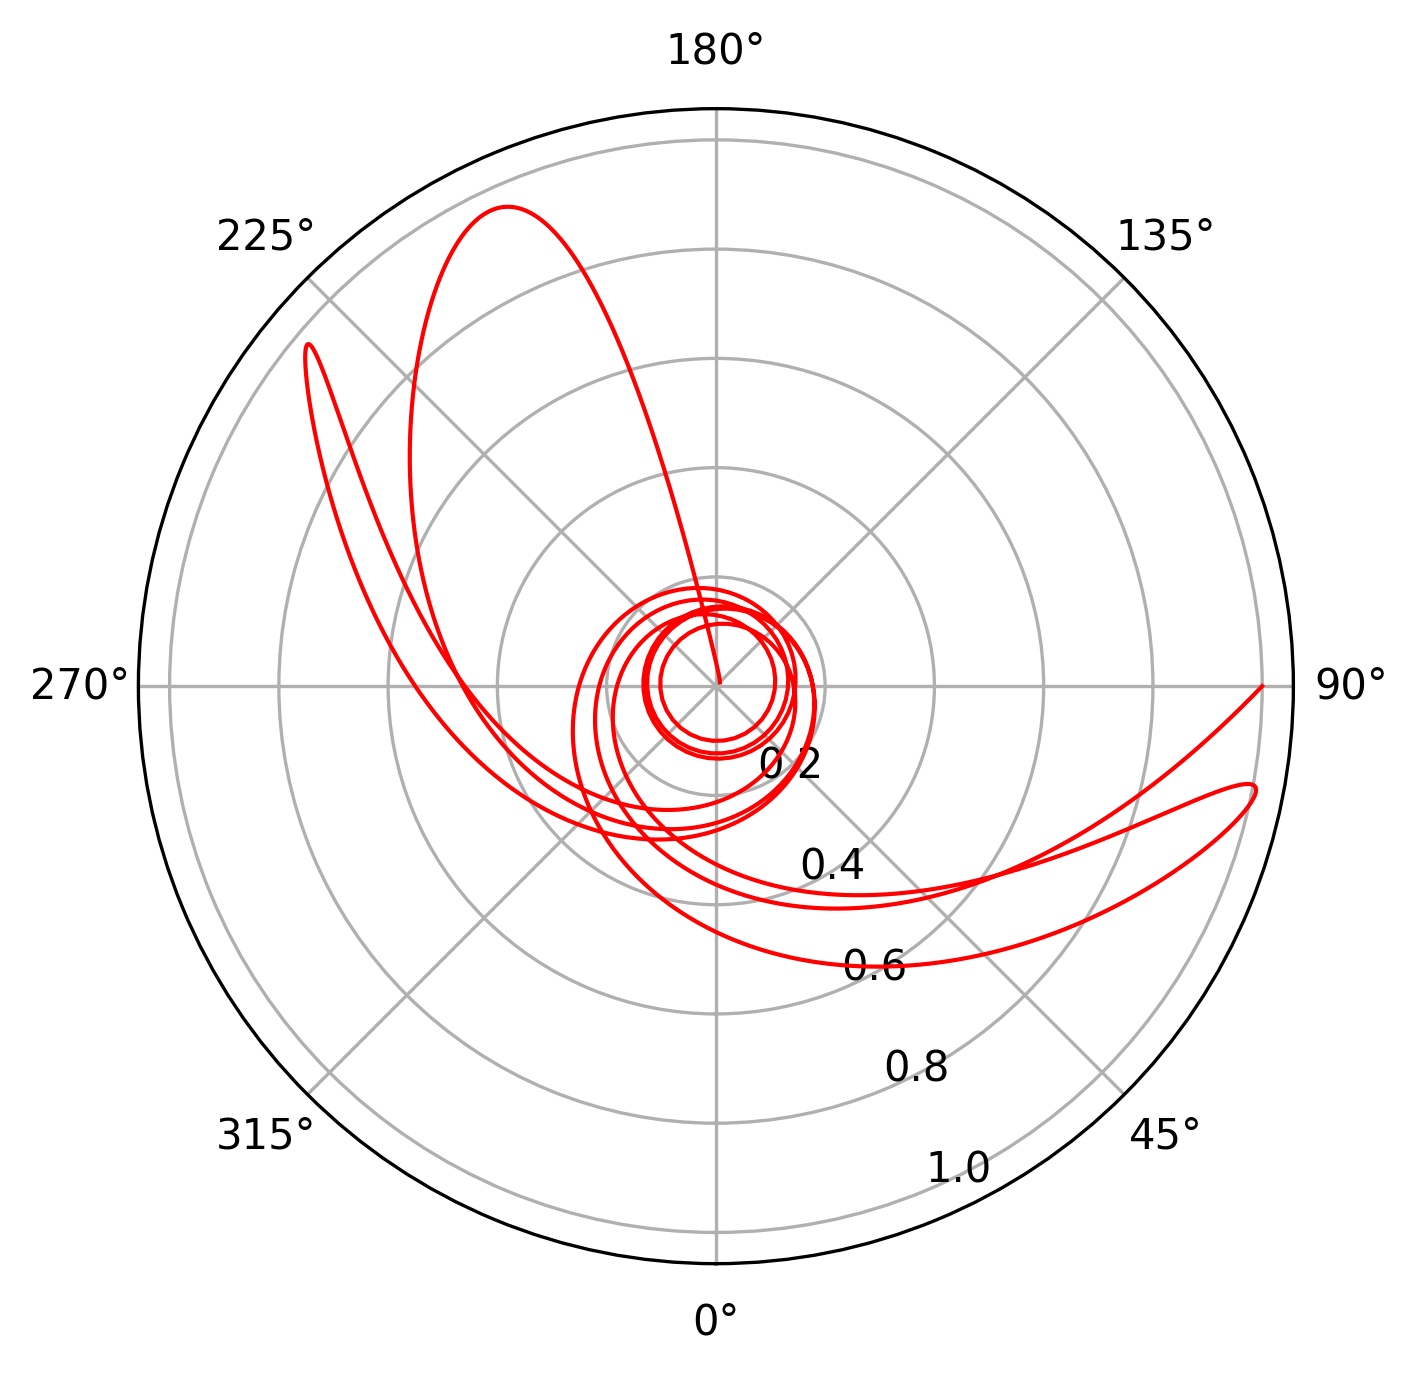

In [16]:
step = 0.001
max_time = 3.196
threshold =  0.01
indices = int(max_time / step)
times = linspace(0, (indices - 1) * step, indices)

# Initialize the initial conditions
r0 = 1
rdot0 = 0
theta0 = - math.pi / 2
theta_dot0 = 0
g = 9.8

non_singular_mu = [2, 3, 5, 6, 16, 19, 21, 24]
periodic_mu = [1.665, 2.394, 1.1727, 1.555]
singular_mu_1 = [10]
singular_mu_2 = [25]
for i in singular_mu_2:

    mu=i
    # Runge-Kutta algorithm initialization variables
    variables = zeros([indices, 4], dtype=float)

    # Calculate
    runge_kutta_4_algorithm()

    # Begin plotting
    plt.figure(dpi=300, figsize=(5, 5))
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_zero_location ("S")
    ax.plot(variables[:, 2], variables[:, 0], color='r', linewidth=1)
    #plt.title('$SAM$ for $\mu = %.3f$ , $r_0 = %.3f$ , $\\theta_0 = %.3f^\degree$, $t_{max} = %.2f$' % (mu, r0, theta0 * 180 / math.pi, max_time), y=1.06)
    ax.grid(True)
    if not flag:
        print('Calculation was successful.')
        plt.savefig('./orbits/singular_orbit_mu'+str(i)+'.png', dpi=300,bbox_inches='tight')
        plt.show()


# Demostración Acotaciones

## Cota Superior - Gráficos

[1.0555555555555556, 1.05, 1.0434782608695652, 1.0344827586206897]


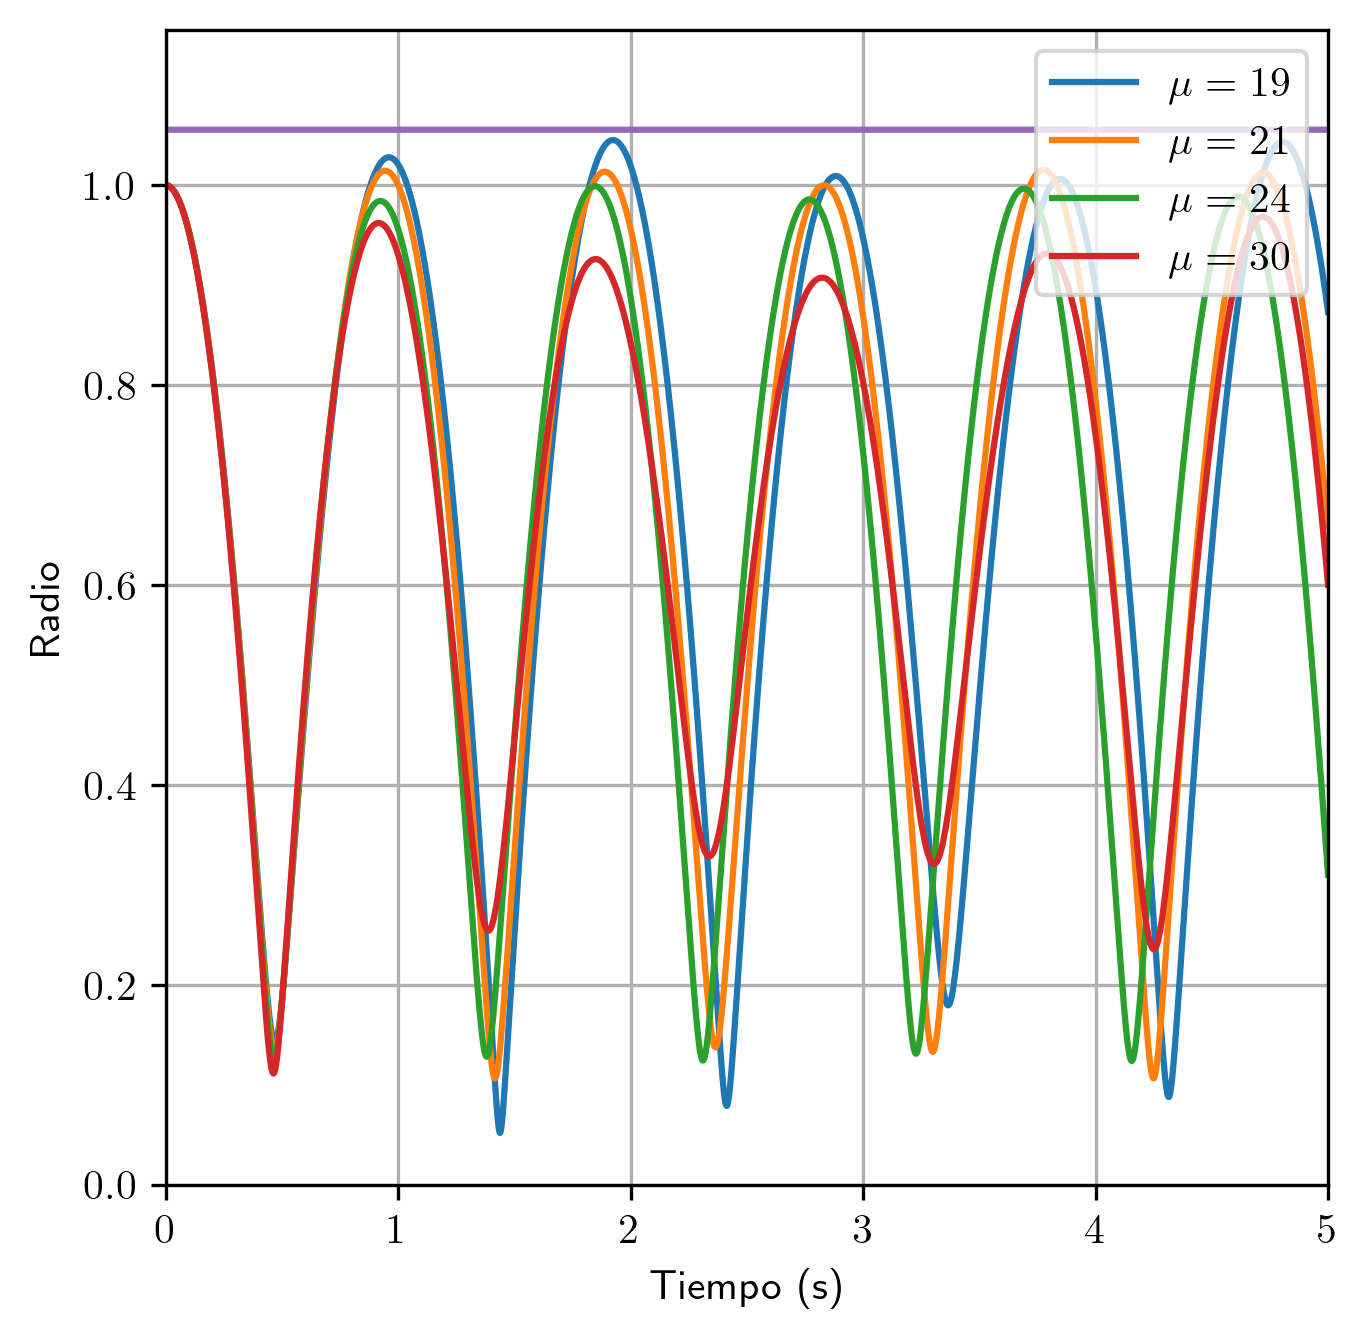

In [52]:
step = 0.001
max_time = 5
threshold =  0.01
indices = int(max_time / step)
times = linspace(0, (indices - 1) * step, indices)



# Initialize the initial conditions
r0 = 1
rdot0 = 0
theta0 = math.pi / 2
theta_dot0 = 0
g = 9.8

# Lo representamos para u=2, 3, 5, 6, 16, 19, 21, 24
non_singular_mu = [19, 21, 24, 30]

fig, ax = plt.subplots(figsize=(5, 5),dpi=300)

for i in non_singular_mu:

    mu=i
    # Runge-Kutta algorithm initialization variables
    variables = zeros([indices, 4], dtype=float)

    # Calculate
    runge_kutta_4_algorithm()

    # Begin plotting
    ax.plot(times,variables[:, 0], label=r'$\mu={}$'.format(mu))
    ax.set_xlabel("Tiempo (s)")
    ax.set_ylabel("Radio")
    #ax.set_title(, fontsize=16, color='r')

    # xlabel="Time (s)", ylabel="Radio", linewidth=1, legend=r'\mu='+str(mu)
    #plt.title('$SAM$ for $\mu = %.3f$ , $r_0 = %.3f$ , $\\theta_0 = %.3f^\degree$, $t_{max} = %.2f$' % (mu, r0, theta0 * 180 / math.pi, max_time), y=1.06)
    ax.grid(True)


if not flag:
    mu_val=[]
    for i in non_singular_mu:
        mu_val.append(i/(i-1))
    print(mu_val)
    plt.plot(times, full_like(times, max(mu_val)))
    plt.xlim(0, max_time)
    plt.ylim(0, max(mu_val)+0.1)
    plt.legend(loc='upper right')
    plt.savefig("./boundness/Cota_Superior_2.png", dpi=300,bbox_inches='tight')
    plt.show()

# Cota Inferior - Gráficos

[-0.25, -0.4285714285714286, -1.0, -4.000000000000001]


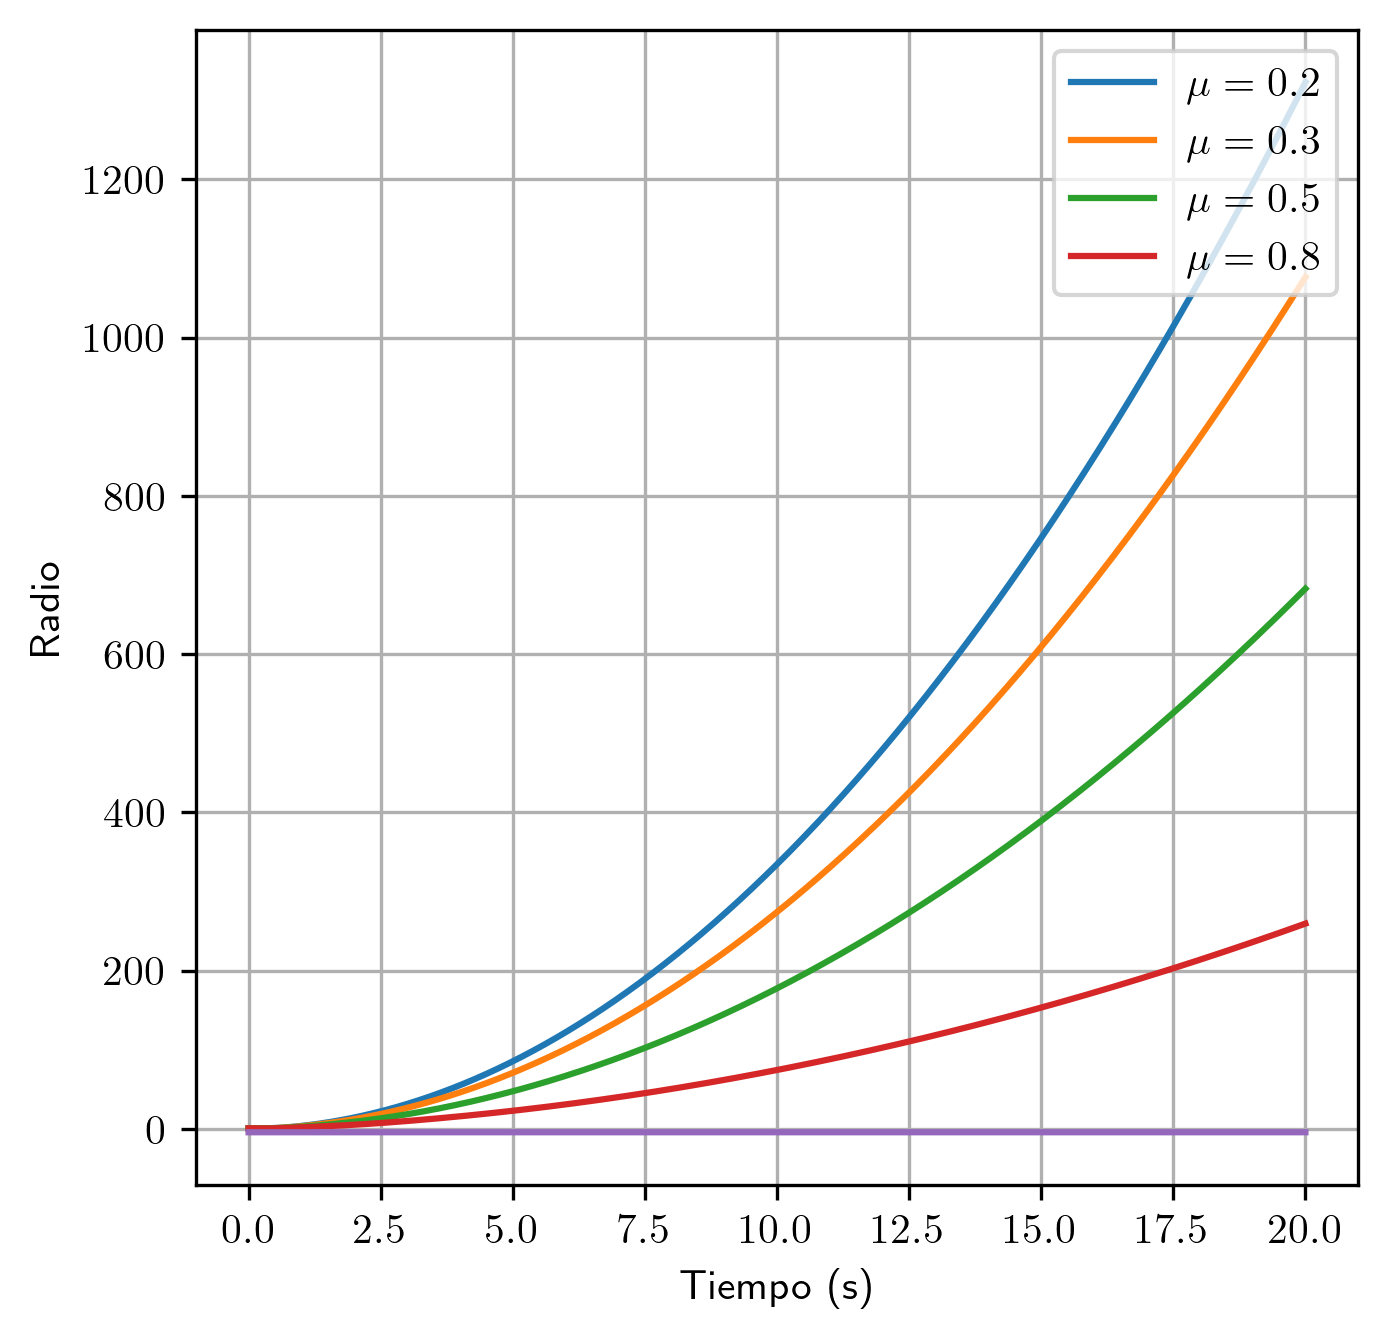

In [53]:
step = 0.001
max_time = 20
threshold =  0.01
indices = int(max_time / step)
times = linspace(0, (indices - 1) * step, indices)



# Initialize the initial conditions
r0 = 1
rdot0 = 0
theta0 = math.pi / 2
theta_dot0 = 0
g = 9.8

# Lo representamos para u=2, 3, 5, 6, 16, 19, 21, 24
non_singular_mu = [0.2, 0.3, 0.5, 0.8]
fig, ax = plt.subplots(figsize=(5, 5),dpi=300)

for i in non_singular_mu:

    mu=i
    # Runge-Kutta algorithm initialization variables
    variables = zeros([indices, 4], dtype=float)

    # Calculate
    runge_kutta_4_algorithm()

    # Begin plotting
    ax.plot(times,variables[:, 0], label=r'$\mu={}$'.format(mu))
    ax.set_xlabel("Tiempo (s)")
    ax.set_ylabel("Radio")
    #ax.set_title(, fontsize=16, color='r')

    # xlabel="Time (s)", ylabel="Radio", linewidth=1, legend=r'\mu='+str(mu)
    #plt.title('$SAM$ for $\mu = %.3f$ , $r_0 = %.3f$ , $\\theta_0 = %.3f^\degree$, $t_{max} = %.2f$' % (mu, r0, theta0 * 180 / math.pi, max_time), y=1.06)
    ax.grid(True)


if not flag:
    mu_val=[]
    for i in non_singular_mu:
        mu_val.append(i/(i-1))
    print(mu_val)
    plt.plot(times, full_like(times, min(mu_val)))
    #plt.xlim(0, max_time)
    #plt.ylim(0, max(mu_val)+0.1)
    plt.legend(loc='upper right')
    plt.savefig("./boundness/Cota_Inferior_1.png", dpi=300,bbox_inches='tight')
    plt.show()

# Representación Cónicas

$\mu =$ CIRCLE

In [ ]:
step = 0.001
max_time = 100
threshold =  0.01
indices = int(max_time / step)
times = linspace(0, (indices - 1) * step, indices)



# Initialize the initial conditions
r0 = 1
rdot0 = 0
theta0 = - math.pi / 2
theta_dot0 = 0
g = 9.8

# Lo representamos para u=2, 3, 5, 6, 16, 19, 21, 24
non_singular_mu = [0.2, 0.3, 0.5, 0.8]
fig, ax = plt.subplots(figsize=(5, 5),dpi=300)

mu= 3

# Runge-Kutta algorithm initialization variables
variables = zeros([indices, 4], dtype=float)

# Calculate
runge_kutta_4_algorithm()

# Begin plotting
data = []
for i in range(len(variables)):
    data.append([variables[i][0]*math.cos(variables[i][2]), variables[i][0]*math.sin(variables[i][2]) ])
data = array(data)
ax.plot(data[:, 0], data[:, 1], linewidth=0.3)
#ax.set_xlabel("Tiempo (s)"([)
#ax.set_ylabel("Radio")
#ax.set_title(, fontsize=16, color='r')

# xlabel="Time (s)", ylabel="Radio", linewidth=1, legend=r'\mu='+str(mu)
#plt.title('$SAM$ for $\mu = %.3f$ , $r_0 = %.3f$ , $\\theta_0 = %.3f^\degree$, $t_{max} = %.2f$' % (mu, r0, theta0 * 180 / math.pi, max_time), y=1.06)
ax.grid(True)


if not flag:
    
    plt.plot([-0.05, 0.05], [0, 0], color='black')  # Horizontal line
    plt.plot([0,0], [-0.05, 0.05], color='black')  # Vertical line
    theta_arr = linspace(-math.pi, math.pi, 1000)
    r_val = [1/(1-math.cos(i)/mu) for i in  theta_arr]
    data_limit=[]
    for i in range(len(r_val)):
        data_limit.append([r_val[i]*math.cos(theta_arr[i]), r_val[i]*math.sin(theta_arr[i])])
    data_limit=array(data_limit)
    ax.plot(data_limit[:, 0], data_limit[:, 1])
    plt.show()

0
1
2


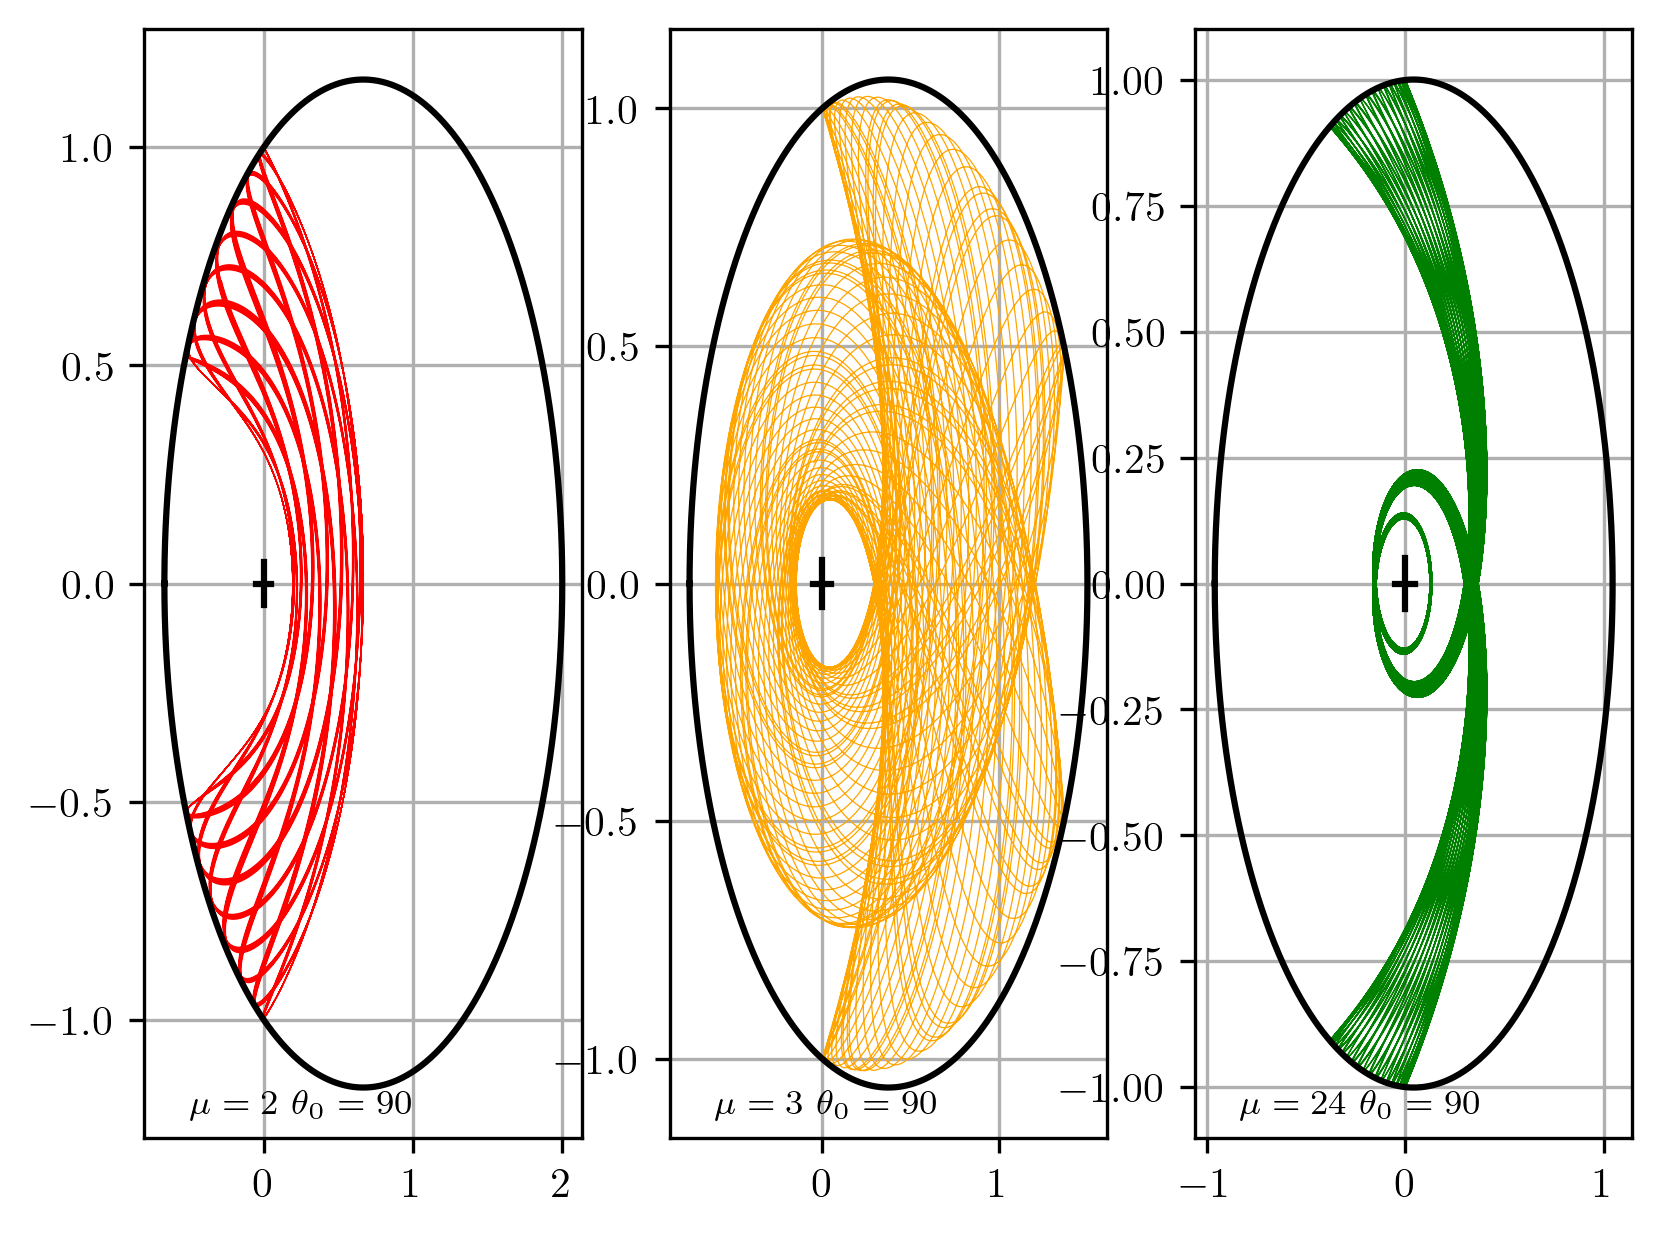

In [66]:
non_singular_mu=[2, 3, 24]
colors=["red", "orange", "green"]
colors_limit="black"
fig, ax = plt.subplots(1, 3,dpi=300)
for i in range(3):
    print(i)
    step = 0.001
    max_time = 100
    threshold =  0.01
    indices = int(max_time / step)
    times = linspace(0, (indices - 1) * step, indices)



    # Initialize the initial conditions
    r0 = 1
    rdot0 = 0
    theta0 = - math.pi / 2
    theta_dot0 = 0
    g = 9.8

    mu= non_singular_mu[i]

    # Runge-Kutta algorithm initialization variables
    variables = zeros([indices, 4], dtype=float)

    # Calculate
    runge_kutta_4_algorithm()

    # Begin plotting
    data = []
    for j in range(len(variables)):
        data.append([variables[j][0]*math.cos(variables[j][2]), variables[j][0]*math.sin(variables[j][2]) ])
    data = array(data)
    
    ax[i].plot(data[:, 0], data[:, 1], linewidth=0.3, color=colors[i], label=r'$\mu={}$ '.format(mu)+ r'$\theta_0=90º$')
    #ax[i].set_xlabel("X")
    #ax[i].set_ylabel("Y")

    ax[i].grid(True)


    if not flag:
        
        ax[i].plot([-0.05, 0.05], [0, 0], color='black')  # Horizontal line
        ax[i].plot([0,0], [-0.05, 0.05], color='black')  # Vertical line
        theta_arr = linspace(-math.pi, math.pi, 1000)
        r_val = [1/(1-math.cos(i)/mu) for i in  theta_arr]
        data_limit=[]
        for j in range(len(r_val)):
            data_limit.append([r_val[j]*math.cos(theta_arr[j]), r_val[j]*math.sin(theta_arr[j])])
        data_limit=array(data_limit)
        ax[i].plot(data_limit[:, 0], data_limit[:, 1], color=colors_limit)
        ax[i].legend(loc='lower left', frameon=False, fontsize="small", handlelength=0, borderpad=0)
plt.savefig("./boundness/Circle_Examples.png", dpi=300,bbox_inches='tight')
plt.show()

$\mu=$ PARABOLA

0
1
2


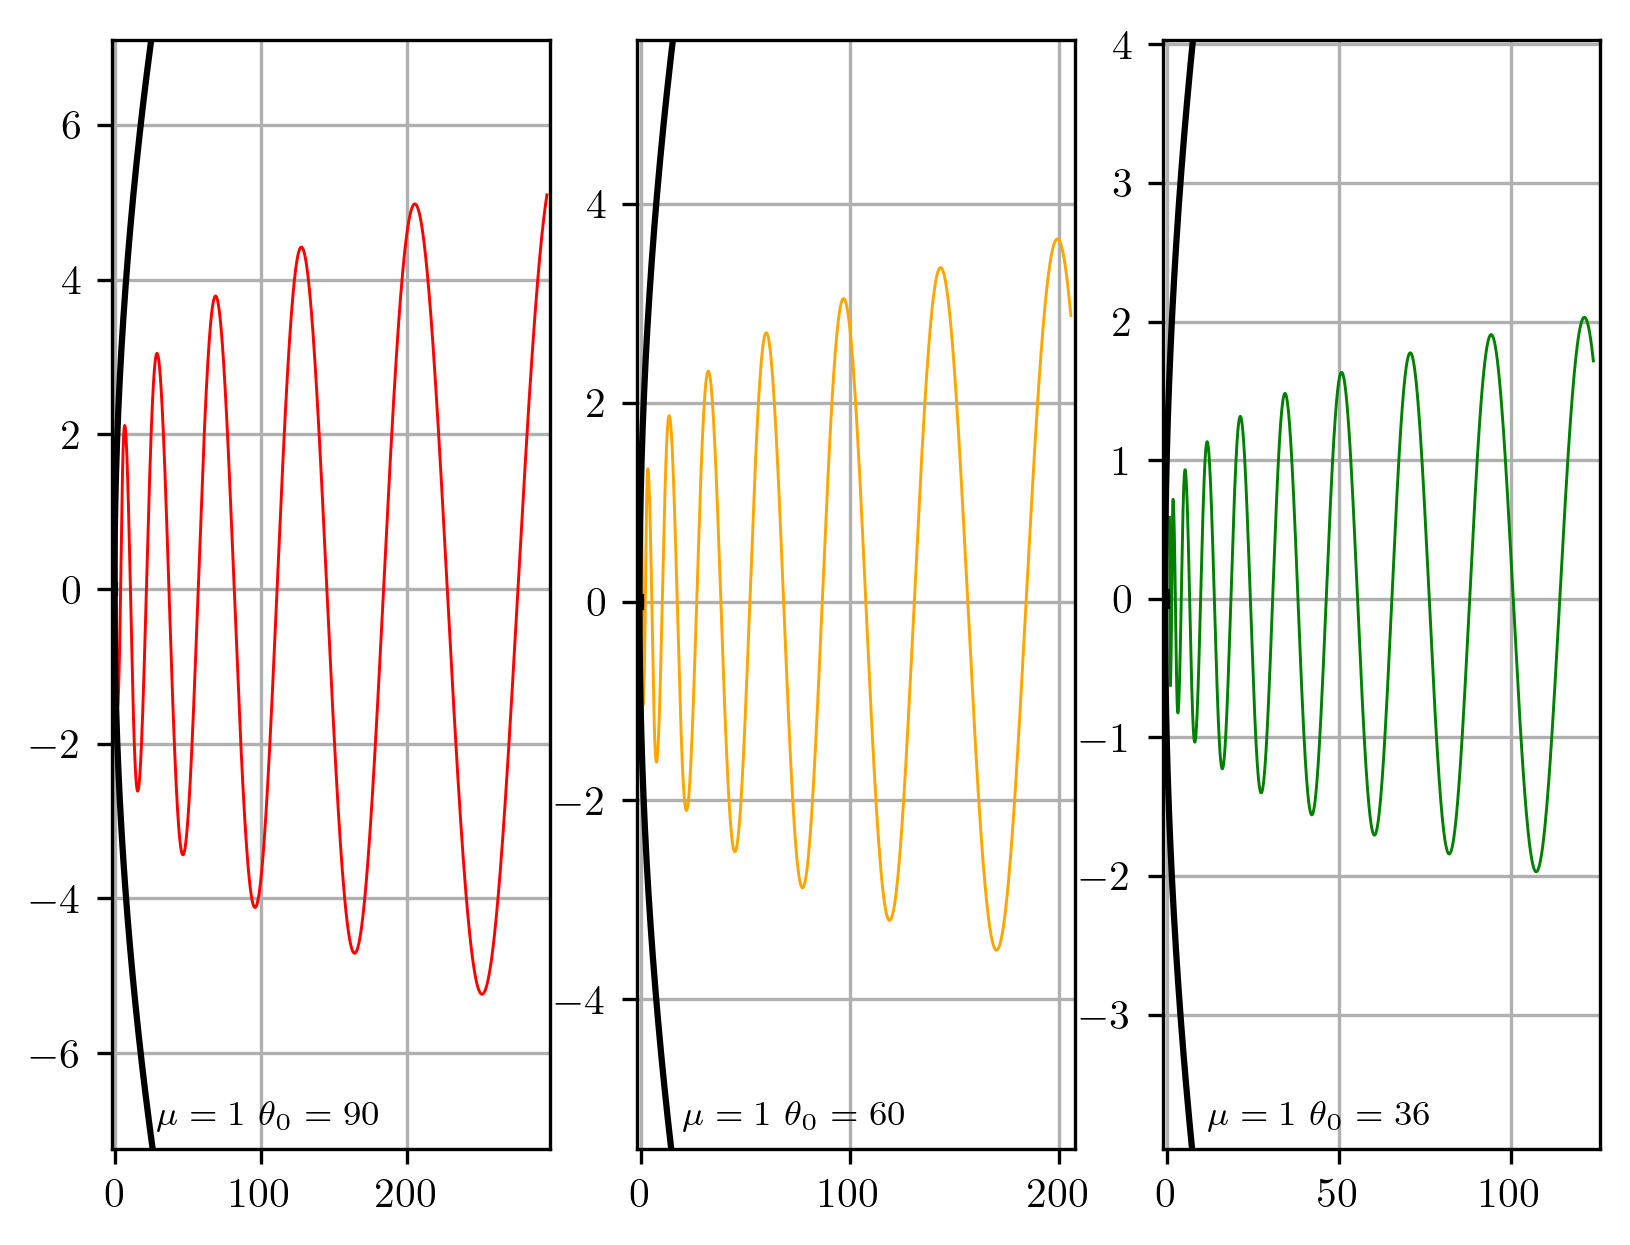

In [63]:
thetadot_param=[-math.pi/2, -math.pi/3, -math.pi/5] # 90  | 60 | 36 grados
thetadot_param_degree=[90, 60, 36] # 90  | 60 | 36 grados
offset=2
colors=["red", "orange", "green"]
colors_limit="black"
fig, ax = plt.subplots(1, 3,dpi=300)
for i in range(3):
    print(i)
    step = 0.001
    max_time = 100
    threshold =  0.01
    indices = int(max_time / step)
    times = linspace(0, (indices - 1) * step, indices)



    # Initialize the initial conditions
    r0 = 1
    rdot0 = 0
    theta0 = thetadot_param[i]
    theta_dot0 = 0
    g = 9.8

    mu= 1

    # Runge-Kutta algorithm initialization variables
    variables = zeros([indices, 4], dtype=float)

    # Calculate
    runge_kutta_4_algorithm()

    # Begin plotting
    data = []
    for j in range(len(variables)):
        data.append([variables[j][0]*math.cos(variables[j][2]), variables[j][0]*math.sin(variables[j][2]) ])
    data = array(data)
    
    ax[i].plot(data[:, 0], data[:, 1], linewidth=0.7, color=colors[i], label=r'$\mu={}$ $\theta_0={}$'.format(mu, thetadot_param_degree[i]))
    #ax[i].set_xlabel("X")
    #ax[i].set_ylabel("Y")

    ax[i].grid(True)


    if not flag:
        
        ax[i].plot([-0.05, 0.05], [0, 0], color='black')  # Horizontal line
        ax[i].plot([0,0], [-0.05, 0.05], color='black')  # Vertical line
        theta_arr = linspace(-math.pi, math.pi, 1000)
        r_val = [1/(1-math.cos(i)/mu) for i in  theta_arr]
        data_limit=[]
        for j in range(len(r_val)):
            data_limit.append([r_val[j]*math.cos(theta_arr[j]), r_val[j]*math.sin(theta_arr[j])])
        data_limit=array(data_limit)
        ax[i].plot(data_limit[:, 0], data_limit[:, 1], color=colors_limit)
        ax[i].set_xlim(min(data[:,0]) -offset, max(data[:,0])+offset)
        ax[i].set_ylim(min(data[:,1])-offset, max(data[:,1])+offset)
        ax[i].legend(loc='lower left', frameon=False, fontsize="small", handlelength=0, borderpad=0)
plt.savefig("./boundness/Parabola_Examples.png", dpi=300,bbox_inches='tight')
plt.show()

$\mu=$ HIPERBOLA

0
[[-2.50000000e-01 -0.00000000e+00]
 [-2.50001236e-01 -1.57239720e-03]
 [-2.50004945e-01 -3.14496547e-03]
 ...
 [-2.50004945e-01  3.14496547e-03]
 [-2.50001236e-01  1.57239720e-03]
 [-2.50000000e-01  6.12323400e-17]]
1
[[-1.00000000e+00 -0.00000000e+00]
 [-1.00001978e+00 -6.28968212e-03]
 [-1.00007913e+00 -1.25806084e-02]
 ...
 [-1.00007913e+00  1.25806084e-02]
 [-1.00001978e+00  6.28968212e-03]
 [-1.00000000e+00  2.44929360e-16]]
2
[[-4.00000000e+00 -0.00000000e+00]
 [-4.00031649e+00 -2.51602214e-02]
 [-4.00126632e+00 -5.03343821e-02]
 ...
 [-4.00126632e+00  5.03343821e-02]
 [-4.00031649e+00  2.51602214e-02]
 [-4.00000000e+00  9.79717439e-16]]


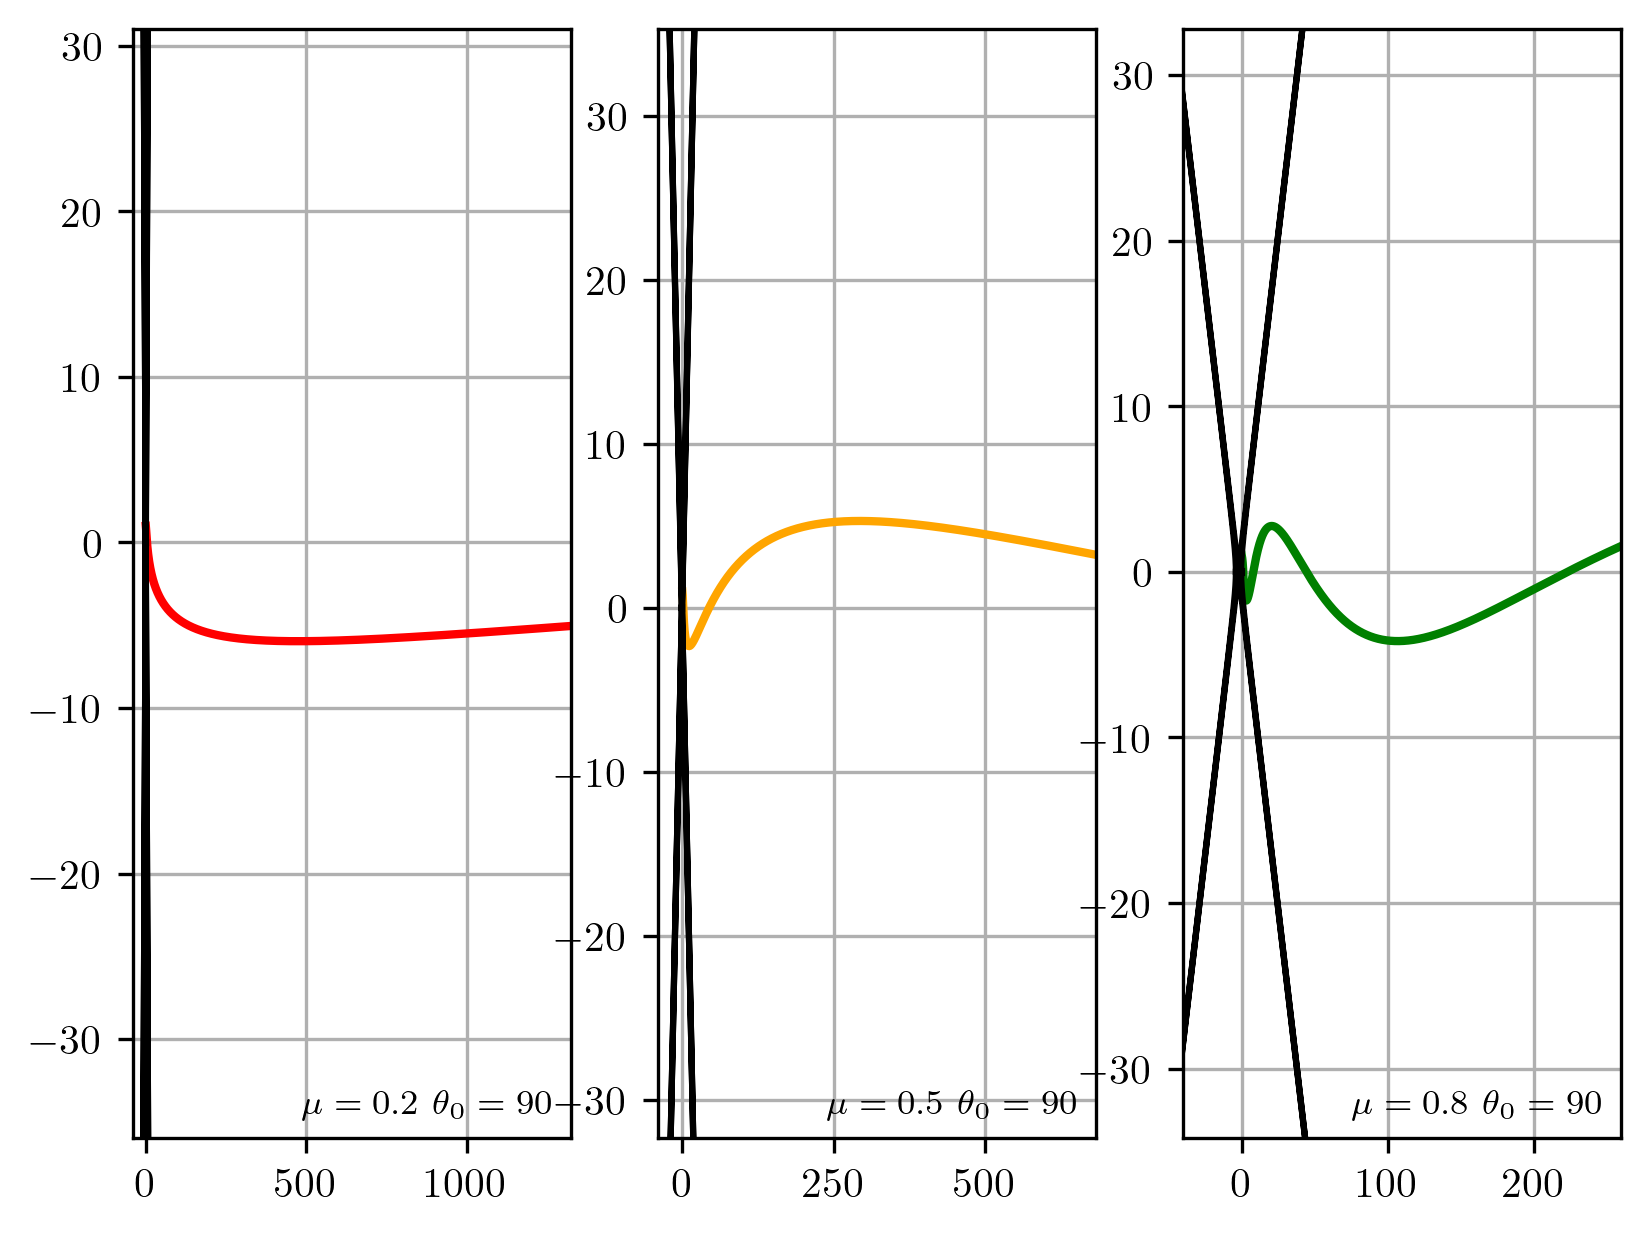

In [93]:
thetadot_param=[-math.pi/2, -math.pi/3, -math.pi/5] # 90  | 60 | 36 grados
thetadot_param_degree=[90, 60, 36] # 90  | 60 | 36 grados
mu_values = [0.2, 0.5, 0.8]
offset=30
colors=["red", "orange", "green"]
colors_limit="black"
fig, ax = plt.subplots(1, 3,dpi=300)
for i in range(3):
    print(i)
    step = 0.001
    max_time = 20
    threshold =  0.01
    indices = int(max_time / step)
    times = linspace(0, (indices - 1) * step, indices)



    # Initialize the initial conditions
    r0 = 1
    rdot0 = 0
    theta0 = -math.pi/2
    theta_dot0 = 0
    g = 9.8

    mu= mu_values[i]

    # Runge-Kutta algorithm initialization variables
    variables = zeros([indices, 4], dtype=float)

    # Calculate
    runge_kutta_4_algorithm()

    # Begin plotting
    data = []
    for j in range(len(variables)):
        data.append([variables[j][0]*math.cos(variables[j][2]), variables[j][0]*math.sin(variables[j][2]) ])
    data = array(data)
    
    ax[i].plot(data[:, 0], data[:, 1], linewidth=2, color=colors[i], label=r'$\mu={}$ $\theta_0=90º$'.format(mu))
    #ax[i].set_xlabel("X")
    #ax[i].set_ylabel("Y")

    ax[i].grid(True)


    if not flag:
        
        ax[i].plot([-0.05, 0.05], [0, 0], color='black')  # Horizontal line
        ax[i].plot([0,0], [-0.05, 0.05], color='black')  # Vertical line
        theta_arr = linspace(-math.pi/1+math.pi, math.pi/1+math.pi, 1000)
        r_val = [1/(1-math.cos(i)/mu) for i in  theta_arr]
        data_limit=[]
        for j in range(len(r_val)):
            data_limit.append([r_val[j]*math.cos(theta_arr[j]), r_val[j]*math.sin(theta_arr[j])])
        data_limit=array(data_limit)
        print(data_limit)
        ax[i].plot(data_limit[:, 0], data_limit[:, 1], color=colors_limit)
        ax[i].set_xlim(min(data[:,0]) -40, max(data[:,0]))
        ax[i].set_ylim(min(data[:,1])-offset, max(data[:,1])+offset)
        ax[i].legend(loc='lower right', frameon=False, fontsize="small", handlelength=0, borderpad=0)
plt.savefig("./boundness/Hiperbola_EXAMPLE.png", dpi=300,bbox_inches='tight')
plt.show()

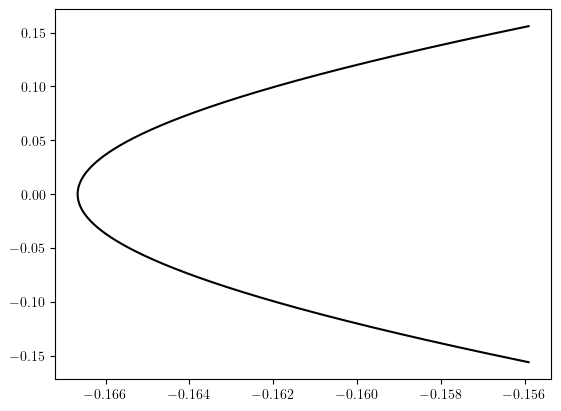

In [76]:
mu=0.2
theta_arr = linspace(-math.pi/4+math.pi, math.pi/4+math.pi, 1000)
r_val = [1/(1-math.cos(i)/mu) for i in  theta_arr]
data_limit=[]
for j in range(len(r_val)):
    data_limit.append([r_val[j]*math.cos(theta_arr[j]), r_val[j]*math.sin(theta_arr[j])])
data_limit=array(data_limit)

plt.plot(data_limit[:, 0], data_limit[:, 1], color=colors_limit)



In [72]:
data[10]

array([ 4.89979978e-04, -9.99754940e-01])